#### Problem Statement Modelling:
  - Total unit of wealth is $1$ which means $w = (w_1, ..., w_n)$ are the values of investment of each asset
  - This also means that sum of all $w_i$ should be 1 (contraint)
  - Now fraction returns have mean $m$ and covariance matrix $V$, $m \in R^{n}$ & $V \in R^{n \times n}$
  
  - $r_m$ is defined as the minimum return of the investment
  
  - $w^TVw$ is therefore the risk of the investment
  
  - The goal is the minimize risk with returns $\geq r_m$
  
  - Hence the problem can be modeled as the following optimization problem:
  
    - Minimize     :  $w^TVw$
    - Subject to   :
      - $m^Tw \geq r_m$
      - $1^Tw = 1$
      - $w \succeq 0$

In [189]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize as sp

#### For solving the optimization problem the minimize() method of the scipy.optimize library is used

In [216]:
class portfolioOptimize:
    def __init__(self, m, V, r_m):
        self.m = m
        self.V = V
        self.r_m = 0
        
        self.eq_cons = {
            'type' : 'eq',
            'fun'  : lambda x: sum(x) - 1
        }
        
        self.ineq_cons = {
            'type': 'ineq', 
            'fun' : lambda x: m.T @ x - r_m
        }
        
        self.x0 = np.random.rand(20, 1)
        self.x0 /= sum(self.x0)
    
    def risk(self, w):
        return w.T @ V @ w
    
    def jacRisk(self, w):
        return 2 * (V @ w)
    
    def optimize(self, display):
        
        res = sp.minimize(self.risk,
                           self.x0,
                           method='SLSQP',
                           jac=self.jacRisk, 
                           constraints=[self.eq_cons, self.ineq_cons],
                           options={'ftol': 1e-9, 'disp': display},
                           bounds=sp.Bounds(0, 1))
        return res.x
    

#### $m$ and $V$ are randomly generated, it is also ensured that $V$ is positive definate.
#### $r_m$ is set to be $0.10$ i.e. $10$%

In [282]:
m = 1.75 * np.random.rand(20, 1) - 0.5
V = np.random.rand(20, 20)
V = np.dot(V, V.transpose())
r_m = 0.10

In [218]:
pOptimize = portfolioOptimize(m, V, r_m)

In [246]:
inves = pOptimize.optimize(True)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 6.2506886402878346
            Iterations: 21
            Function evaluations: 160
            Gradient evaluations: 17


In [247]:
# Contraint
print("Returns: ", inves @ m)

Returns:  [0.24129471]


In [248]:
# Contraint
print("Totol Investment: ", sum(inves))

Totol Investment:  1.00000000005169


In [283]:
rs = np.linspace(0, 1, 200)
risk = []
for r in rs:
    pOptimize = portfolioOptimize(m, V, r)
    w = pOptimize.optimize(False)                # Do no Display Ouput, it's cumbersome
    risk.append(pOptimize.risk(w))

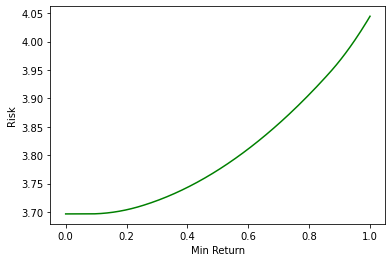

In [284]:
plt.plot(rs, risk, 'g')
plt.xlabel('Min Return')
plt.ylabel('Risk')
plt.show()

#### We can observe that the risk increases as the min target return increases

## Bonus

### The distributions used to generate $m$ does have an affect on the final results
  - Say if m has a large value, this means all the stocks will be able to returns more profit. If some value of $r_m$ was previously infeasible could become feasible. 
  - Note that risk depends one $V$ but the possible values that $w$ could take are contrainted by $m$. And hence change $m$ would indirecly affect the results

In [285]:
m = 2 * np.random.rand(20, 1)       # High Retuns for the same V

In [289]:
rs = np.linspace(0, 2, 200)
risk = []
for r in rs:
    pOptimize = portfolioOptimize(m, V, r)
    w = pOptimize.optimize(False)                # Do no Display Ouput, it's cumbersome
    risk.append(pOptimize.risk(w))

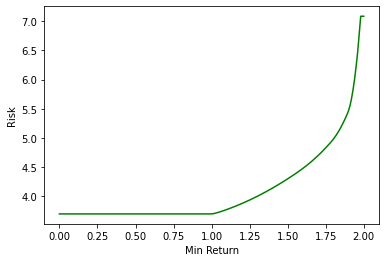

In [290]:
plt.plot(rs, risk, 'g')
plt.xlabel('Min Return')
plt.ylabel('Risk')
plt.show()

#### We can observe that the results obtained for m from different distributions are different from the previous results